In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

## A3 Q2: This Detector is Garbage
## Abigail deGroot 
## 21012489

mu = 5
desired_std_dev = 0.1
num_simulations = 1000

# Function to estimate mu from counts
def estimate_mu(N0, N_ge_1):
    return -np.log(N0 / (N0 + N_ge_1))

std_devs = []
for _ in range(num_simulations):
    n = 500  # Starting point
    while True:
        pulses = np.random.poisson(mu, n)
        N0 = np.sum(pulses == 0)
        N_ge_1 = np.sum(pulses > 0)
        
        mu_est = estimate_mu(N0, N_ge_1)
        
        std_dev = np.std(mu_est)
        
        if std_dev <= desired_std_dev:
            std_devs.append(std_dev)
            break
        else:
            n += 1

average_pulses_needed = np.mean(n)
print(average_pulses_needed)



500.0


/var/folders/wn/msmf3hb111z3bx5n6lr0chp00000gn/T/ipykernel_11207/467767440.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.log(N0 / (N0 + N_ge_1))


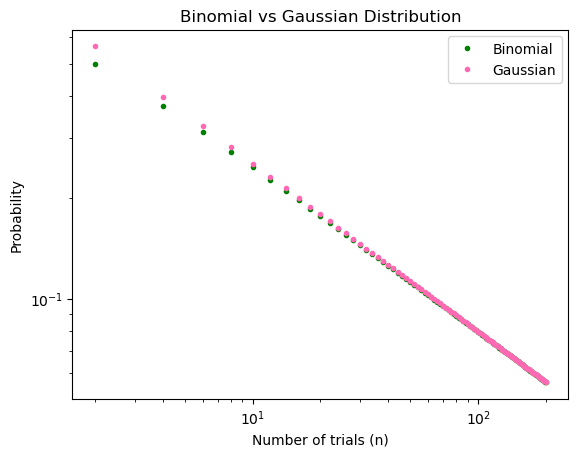

In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt

## A3 Q3: Great Googly Moogly 
## Abigail deGroot 
## 21012489


N = list(range(2, 202, 2))

def binomial():
    P = []
    for n in N:
        x = int(n/2)
        p = (math.factorial(n) / ((math.factorial(x) * math.factorial(n - x)))) * (0.5 ** n)
        P.append(p)
    return P


def gaussian():
    P = []
    for n in N:
        x = int(n/2)
        mean = n * 0.5  
        sigma = np.sqrt(n * 0.5 * 0.5) 
        p = (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mean) / sigma) ** 2)
        P.append(p)
    return P

plt.loglog(N, binomial(), 'g.', label='Binomial')
plt.loglog(N, gaussian(), '.', color='hotPink', label='Gaussian')
plt.legend()
plt.xlabel('Number of trials (n)')
plt.ylabel('Probability')
plt.title('Binomial vs Gaussian Distribution')
plt.show()


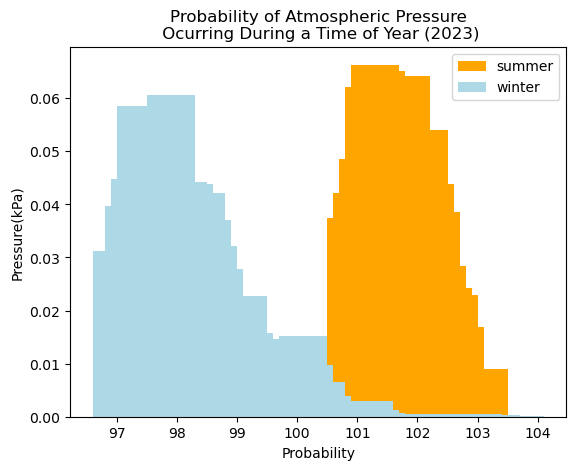

From the graph we can observe that winter is asymmetrical compared to summer


In [246]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

## A3 Q5: The Magic School Bus, season 1: episode 13
## Abigail deGroot 
## 21012489
  
with open("weather_data_2023.csv", "r") as source: 
    reader = csv.reader(source) 
      
    with open("pressure_data_2023.csv", "w") as result: 
        writer = csv.writer(result) 
        for r in reader: 
            writer.writerow((r[1], r[2], r[3], r[4], r[16]))# Use CSV index to pick columns from CSV 


data = pd.read_csv("pressure_data_2023.csv", low_memory = False ).to_numpy()

"""
define summer and winter as 6 month windows not overlapping, centered around january and july, respeectively  
"""

def winter(): # returns array containing the date and time of pressure readings during winter 
    winter = [] 
    def countr(): #finds index winter
        c = 0 
        while data[c][0] < 9.0:
            c+=1
        return c
    c = countr()
    while c < len(data):
        winter.append(list(data[c]))
        c+=1
    c = 0 
    while data[c][0] < 4.0:
        winter.append(list(data[c]))
        c+=1
    for i in range(len(winter)):     # rounds pressures to nearest 10th 
        winter[i][4] = round(winter[i][4], 1)
        
        

    return winter 



def summer(): # returns array containing the date and time of pressure readings during summer 
    def countr(): #finds index summer
        c = 0 
        while data[c][0] <= 4.0:
            c+=1
        return c
    summer = [] 
    c = countr()
    while data[c][0] <= 9.0 :
        summer.append(list(data[c]))
        c+=1
    for i in range(len(summer)):     # rounds pressures to nearest 10th 
        summer[i][4] = round(summer[i][4], 1)
    return summer 



def counter(arr):
    # counts the number of occurrences of each pressure value
    count = []  # will take the form: [[pressure1, number of occurrences], [pressure2, number of occurrences], ...]

    def check(lst):
        # gives false if pressure is not already in count, otherwise gives the index of that pressure value
        for i in range(len(count)):
            if lst[4] == count[i][0]:
                return i
        return False

    for i in range(len(arr)):
        index = check(arr[i])
        if index is False:
            count.append([arr[i][4], 1])
        else:
            count[index][1] += 1

    return count

    
def summerPressures(): 
        count = counter(summer())
        summrx= []
        for i in range(len(count)): 
            summrx.append(count[i][0]) 
        return np.sort(summrx)
    
def winterPressures(): 
        count = counter(winter())
        winterx= []
        for i in range(len(count)): 
            winterx.append(count[i][0]) 
        return np.sort(winterx)

def prob(arr):
    # takes a 2D array for pressure and occurrences and finds the probability for each pressure
    prob = []
    total = 0 
    for i in range(len(arr)): # Sum of all occurrences
        total += arr[i][1]
    for i in range(len(arr)):
        p = arr[i][1] / total  # Probability calculation
        prob.append(p)
    
    return prob



plt.title("Probability of Atmospheric Pressure\n Ocurring During a Time of Year (2023)")   
plt.bar(summerPressures()[1:], prob(counter(summer()))[1:], color = 'orange', label = "summer")
plt.bar(winterPressures()[1:], prob(counter(winter()))[1:], color = 'lightblue', label = "winter")
plt.xlabel("Probability")
plt.ylabel("Pressure(kPa)")
plt.legend()
plt.show()
print("From the graph we can observe that winter is asymmetrical compared to summer")
